# **FREE SOUND AUDIO TAGGING**

Freesound is a collaborative database of Creative Commons Licensed sounds. The aim of this competition is to classify audio files that cover real-world sounds from musical instruments, humans, animals, machines, etc. Few of the labels are: bark, bass_drum, bus,etc. One of the challenges is that not all labels are manually verified. A creative solution should be able to partially rely on these weak annotations.



In this project we have tried to calculate MFCC of the audio files .

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

MFCCs are commonly derived as follows:


1.   Take the Fourier transform of (a windowed excerpt of) a signal.

2.   Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.

3.   Take the logs of the powers at each of the mel frequencies.

4.   Take the discrete cosine transform of the list of mel log powers, as if it were a signal.

5.   The MFCCs are the amplitudes of the resulting spectrum.






In [1]:
import os
os.getcwd()

'/home/hj20/1_ne/수치최적화'

In [13]:
!sudo apt update
!sudo apt-get install -y libsndfile1

[sudo] password for hj20: 
[sudo] password for hj20: 


In [14]:
!pip install SoundFile


In [16]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import IPython.display as ipd
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import find_peaks
from scipy.fftpack import dct
from scipy.io import wavfile
from skimage import util
import scipy.signal as signal
from pandas import read_csv
import seaborn as sns
import scipy
import pandas as pd
import numpy as np
import pylab
import librosa
import librosa.display
import wave
import struct
import sklearn
plt.style.use('classic')
%matplotlib inline
# Set default font size
#plt.rcParams['font.size'] = 20
#pd.set_option('display.max_columns',60)
#plt.style.available

In [17]:
def printsig():
    print('fs_rate:',fs_rate, 'Channels:', audio_chnl, 'duration:',duration,'sec.', 'Ts:', Ts, 'time:',time,'time_len:',time_len)
    # Plot original Audio signal
    plt.figure(figsize=(10, 3))
    plt.plot(time, sig_o)
    plt.title('Origin wave signal')
    plt.ylabel('Amplitude')
    plt.xlabel('Time')
    plt.show() 
    plt.figure(figsize=(10, 3))
    plt.plot(time, sig_s)
    plt.title('windowed wave signal')
    plt.ylabel('Amplitude')
    plt.xlabel('Time')
    plt.show() 

In [18]:
def print_mfcc():
    # Plot mfcc - the amplitude envelope of a waveform.
    plt.figure(figsize=(10, 3)) 
    librosa.display.waveplot(mfcc, sr=fs_rate)
    plt.title('mfcc envelope')
    plt.ylabel('Envelope Amplitude')
    plt.show()    
    # Plot mfcc spectrum.
    plt.figure(figsize=(10, 3))
    plt.title('mfcc spectogram')
    mfcc_spec=librosa.feature.mfcc(y=sig_s, sr=fs_rate)
    mfcc_spec=sklearn.preprocessing.scale(mfcc_spec, axis=1)
    librosa.display.specshow(mfcc_spec, sr=fs_rate, x_axis='time') 
    plt.show()     

In [19]:
def print_fft(sigfft,sigfreqs):
    # plot fft of signal
    plt.figure(figsize=(10, 3))
    plt.plot(sigfreqs,sigfft) 
    plt.title('FFT of signal')
    plt.ylabel('Power')
    plt.xlabel('Frequency')
    plt.show() 

    plt.figure(figsize=(10, 3))
    l=int(len(sigfft)/2)
    plt.plot(sigfreqs[1:l],sigfft[1:l]) 
    plt.title('positive FFT of signal')
    plt.ylabel('Power')
    plt.xlabel('Frequency')
    plt.show()  

In [20]:
def print_spectogram():
    frqs, times, xsig = signal.spectrogram(sig_s, fs_rate,  nperseg=1024,  # window='hamming',
                                       noverlap = 1024-256,detrend=False, scaling='spectrum')
    plt.figure(figsize=(10,5));
    plt.pcolormesh(times, frqs/1000, 20*np.log10(xsig), cmap='viridis' ) #viridis  magma  
    plt.title('Signal Spectrogram')
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [kHz]');
    plt.show()  

In [21]:
def find_N(N_len):
    return 2**14 if N_len>=2**14 else N_len

In [22]:
def process_fft():
    #entire signal 
    N=find_N(time_len)
    #N=time_len
    fftsig= np.fft.fft(sig,N)
    sigfft=np.abs(fftsig)
    sigfreqs = np.fft.fftfreq(N,Ts)

    # slice signal to small frames
    frame_len = 1024 # about 20msec
    frame_time = Ts
    frames = util.view_as_windows(sig, window_shape=(frame_len,), step=512) #step=128)
    win = np.hanning(frame_len+1)[:-1]   # to try with hamming as well
    frames = frames*win
    frames = frames.T
    num_of_frames=frames.shape[0]
    #print(f'Signal shape: {sig.shape}, framed signal shape: {frames.shape[1]}')
    spects= np.fft.fft(frames, n=frame_len, axis=0)
    spects=np.abs(spects)
    #max_pwr = spects.max()
    frame_f = np.fft.fftfreq(frame_len,frame_time) #scipy.fftpack.fftfreq(frame_len,frame_time)
    pos=int(frame_len/2)
    max_val = np.amax(spects) # find fft max value    
            
    for x in range(frames.shape[1]):      
        idxs = np.argmax(spects[:pos,x])   # index of max peak in frame :pos
        if spects[idxs,x] > (0.5 * max_val): # 0.65
            sig_freqs.append(frame_f[idxs])  # create a list of frequencies in each frame        

#         if fname=='962ffc01.wav':#3315ec7f.wav 0006ae4e 6459fc05 
#             print('column', x)
#             print(f'maximum value in column {x} {np.amax(spects[:pos,x])}')
#             print(f'the idxs {idxs} with the value  of {spects[idxs,x]}') 
    
    # prints and plots a single wave file
    if fname=='074a72f0.wav':  # 6459fc05 / 3315ec7f / 962ffc01.wav  / 54073d7e / d41f1ae5.wav
        print('File: 074a72f0.wav, Labled: Bicycle bell ')  
        printsig()
        print_mfcc()
        print_fft(sigfft,sigfreqs)
        print_spectogram()
        #print('max val',max_val)
        print(f'sig_freqs: {sig_freqs}')
        
    static_feats=[np.mean(sig_freqs), np.median(sig_freqs),np.std(sig_freqs),np.var(sig_freqs),
                  min(sig_freqs), max(sig_freqs)]

    return static_feats

## 1.  Data  Collection 

In [25]:

classes = ['Bark','Bass_drum','Bicycle_bell','Bus','Car_passing_by','Male_speech_and_man_speaking',
           'Male_speech_and_man_speaking,Male_singing','Female_speech_and_woman_speaking','Female_speech_and_woman_speaking,Whispering']

# Reading wave files name
df_train_curated = pd.read_csv("/home/hj20/input/freesound-audio-tagging-2019/train_curated.csv")  
# Creating file names df for selected categories
df_train_curated = df_train_curated.loc[df_train_curated['labels'].isin(classes)]
df_files = df_train_curated.copy()
df_files.sort_values('labels', ascending=True, inplace=True);
df_files = df_files.reset_index(drop=True)
print(f'From dataset: {len(df_files)} Sound files')
df_files.head()

From dataset: 446 Sound files


,fname,labels,freesound_id,license
0,4e5c0a8a.wav,Bark,360411,CC-BY-NC
1,fd6af2dd.wav,Bark,236212,CC-BY-NC
2,9f93d461.wav,Bark,235885,CC-BY-NC
3,df2362c8.wav,Bark,235871,CC-BY-NC
4,734f83b2.wav,Bark,236214,CC-BY-NC


In [26]:
df_files

,fname,labels,freesound_id,license
0,4e5c0a8a.wav,Bark,360411,CC-BY-NC
1,fd6af2dd.wav,Bark,236212,CC-BY-NC
2,9f93d461.wav,Bark,235885,CC-BY-NC
3,df2362c8.wav,Bark,235871,CC-BY-NC
4,734f83b2.wav,Bark,236214,CC-BY-NC
...,...,...,...,...
441,59757211.wav,Male_speech_and_man_speaking,93870,CC-BY
442,4607d472.wav,Male_speech_and_man_speaking,93854,CC-BY
443,c64bee90.wav,Male_speech_and_man_speaking,274890,CC-BY
444,c5691d33.wav,Male_speech_and_man_speaking,429038,CC0


In [27]:
# combine Male / Female voices
classes = classes[:-2]
classes[-2]='Male_voice'
classes[-1]='Female_voice'
male = dict.fromkeys(['Male_speech_and_man_speaking','Male_speech_and_man_speaking,Male_singing'], 'Male_voice')    
female = dict.fromkeys(['Female_speech_and_woman_speaking','Female_speech_and_woman_speaking,Whispering'],'Female_voice')  
df_files = df_files.replace(male)
df_files = df_files.replace(female)
classes

['Bark',
 'Bass_drum',
 'Bicycle_bell',
 'Bus',
 'Car_passing_by',
 'Male_voice',
 'Female_voice']

In [28]:
#find the number of files for each class
for cls in classes: 
    files_len=len(df_files[df_files.labels==cls])  # The number of files 
    print(cls, files_len, 'files')

Bark 69 files
Bass_drum 68 files
Bicycle_bell 67 files
Bus 70 files
Car_passing_by 62 files
Male_voice 62 files
Female_voice 48 files


## $ 2. \; EDA \; and \; Data \; features \; generation $ &#128204;

In [29]:
# New features dataframe
features_df = pd.DataFrame(columns=['file_name', 'avrg_freq','med_freq','std_Freq','var_freq',
                                    'min_freq', 'max_freq',
                                    'mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8',
                                    'mfcc9','mfcc10','mfcc11','mfcc12','class',]) 


calculating mel frequency septrum for the audio files(.wav)


In [31]:
for cls in classes: 
    fnames = df_files[df_files['labels']==cls].fname
    
    for fname in fnames: #i in range(len(fnames)-1): 
            # Reading wav files
            fs_rate, sig = scipy.io.wavfile.read(fname)
            duration = len(sig) / fs_rate
            audio_chnl = len(sig.shape)    # number of Channels
            Ts = 1.0 / fs_rate            # Timestep between samples
            time=np.linspace(0, duration, num = len(sig), endpoint=True)
            time_len = len(time)

            fltr_coef = 0.97 # filter coefficiant typical value
            sig_o = np.append(sig[0], sig[1:] - fltr_coef * sig[:-1])  #  floating point

            sig_freqs = []
            static_feats = []

            # windowing the signal
            wind = np.hanning(len(sig)+1)[:-1]  
            sig_s  = sig_o * wind

            # mel-frequency ceptral coefficiens
            mfcc = np.mean(librosa.feature.mfcc(y=sig_s, sr=fs_rate, n_mfcc=12).T,axis=0)

            static_feats = process_fft()   # wave processing in the frequency domain

            features_df.loc[len(features_df)] = [fname]+list(static_feats)+list(mfcc)+[cls]   

FileNotFoundError: [Errno 2] No such file or directory: '4e5c0a8a.wav'

In [30]:
df_files[df_files['labels']==cls].fname

336    34fffe67.wav
337    3e5960be.wav
338    3467e392.wav
339    7730996a.wav
340    7a60b25a.wav
341    019234bc.wav
342    0a9f7b92.wav
343    80ec7804.wav
344    714193e8.wav
345    15948929.wav
346    527aa9cd.wav
347    a12616ce.wav
348    8db34522.wav
349    dd182036.wav
350    26612c89.wav
351    67834573.wav
352    6fac21a9.wav
353    04e02685.wav
354    eaf3751d.wav
355    d8f81345.wav
356    f1aa246f.wav
357    45a8cdc3.wav
358    9f55438d.wav
359    fdc0eb26.wav
360    cc1c7be2.wav
361    08d21a2f.wav
362    e42d210d.wav
363    d41f1ae5.wav
364    c83daa50.wav
365    c99a504d.wav
366    41d11012.wav
367    0576e3aa.wav
368    d70d9daf.wav
369    fcc315da.wav
370    e10f242e.wav
371    4093520e.wav
372    b7e78f30.wav
373    b81b0a6a.wav
374    e7428cde.wav
375    59036a5b.wav
376    a3fe3abd.wav
377    f608d2f3.wav
378    37010ae4.wav
379    db203cb0.wav
380    40f18695.wav
381    bc2cc53b.wav
382    52f02500.wav
383    d7f11d34.wav
Name: fname, dtype: object

### Clean data and save to csv file 

1. Deleting outliers.
2. replacing empty features with mean values

In [23]:
features_df=features_df[features_df['max_freq']>0]    

map_std=features_df[features_df['std_Freq']>0].groupby('class')['std_Freq'].mean()
map_var=features_df[features_df['var_freq']>0].groupby('class')['var_freq'].mean()

features_df.loc[features_df['std_Freq']==0,'std_Freq'] = features_df[features_df['std_Freq']==0]\
                                                         .apply(lambda df_row: map_std.loc[df_row['class']], axis=1)

features_df.loc[features_df['var_freq']==0,'var_freq'] = features_df[features_df['var_freq']==0]\
                                                         .apply(lambda r: map_var.loc[r['class']], axis=1)

features_df.loc[features_df['min_freq']==0,'min_freq'] = features_df[features_df['min_freq']==0]\
                                                         .apply(lambda r: map_var.loc[r['class']], axis=1)

features_df.loc[features_df['med_freq']==0,'med_freq'] = features_df[features_df['med_freq']==0]\
                                                         .apply(lambda r: map_var.loc[r['class']], axis=1)

# Save all features in csv file
features_df.to_csv('features.csv', encoding='utf-8') #  (index=False)

b_s = '\033[1m'
b_e = '\033[0m'
print(b_s,'\033[34m ......{} files were recorded in features.csv'.format(len(features_df.file_name)),b_e)

  ......437 files were recorded in features.csv 


##Playing Audio files

male voice audio

In [24]:
ipd.Audio('bfa6c58b.wav')     

In [25]:
features_df.describe()

,avrg_freq,med_freq,std_Freq,var_freq,min_freq,max_freq,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
count,437.000000,4.370000e+02,437.000000,4.370000e+02,4.370000e+02,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,1714.975382,1.388106e+04,493.984883,1.122821e+06,7.779526e+04,2574.523563,375.134479,24.678250,-17.396374,5.584920,-7.425052,8.543931,-5.698367,2.642016,0.038695,-0.350200,0.145309,3.220312
std,3190.425872,1.322622e+05,871.396225,3.468166e+06,5.125663e+05,4019.073220,211.275009,51.697533,30.412601,25.954276,21.118322,14.313422,15.952629,12.575812,10.333876,10.887887,8.657009,7.846605
min,4.306641,2.153320e+01,6.565704,4.310846e+01,4.306641e+01,43.066406,-714.379517,-154.912399,-120.625435,-63.300400,-63.976063,-49.920753,-69.451759,-43.290451,-37.355553,-31.305672,-24.374104,-32.203022
25%,119.377056,1.291992e+02,33.153501,1.275117e+03,8.613281e+01,258.398438,282.514160,-11.157612,-33.934330,-10.939607,-18.409933,-1.366187,-15.618380,-5.731610,-6.092850,-6.159464,-5.487853,-0.655395
50%,465.900213,4.737305e+02,117.942211,1.473846e+04,4.306641e+02,775.195312,405.984375,34.211407,-15.968446,8.558620,-6.504210,7.886462,-3.871413,2.057640,0.008798,0.179959,-0.127821,3.410988
75%,832.617188,9.474609e+02,379.723813,1.524761e+05,4.134375e+03,1894.921875,506.765289,63.322281,-0.031416,21.859047,4.993975,17.229292,4.499767,10.607823,6.561881,5.644406,5.397523,8.201998
max,16760.009766,1.932500e+06,6890.625000,4.748071e+07,5.594696e+06,20456.542969,720.246338,196.092545,80.789375,84.006363,60.900364,52.847149,39.121727,39.295929,33.172672,32.882030,26.409901,22.934498


## View Features & Classes Correlations 


In [26]:
df_dumm = pd.get_dummies(features_df[features_df.columns[2:]])  
df_dumm.head()

,med_freq,std_Freq,var_freq,min_freq,max_freq,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc10,mfcc11,mfcc12,class_Bark,class_Bass_drum,class_Bicycle_bell,class_Bus,class_Car_passing_by,class_Female_voice,class_Male_voice
0,430.664062,174.251292,30363.512591,387.597656,904.394531,303.784454,66.394699,1.558475,-2.095552,-17.995064,...,3.885236,-1.637586,0.613085,1,0,0,0,0,0,0
1,602.929688,101.183144,10238.028717,602.929688,1119.726562,304.232513,63.922817,-13.333472,-29.750040,-39.952824,...,-24.347452,-3.326865,0.432651,1,0,0,0,0,0,0
2,689.062500,59.446079,3533.836342,559.863281,775.195312,369.773376,67.601349,-8.089478,-41.293274,-43.415321,...,-29.146072,-1.641885,2.157134,1,0,0,0,0,0,0
3,947.460938,107.661133,11590.919495,473.730469,1033.593750,354.803436,26.290453,-23.782127,-14.688435,-31.060270,...,-10.449725,-9.908525,-0.281396,1,0,0,0,0,0,0
4,602.929688,53.157724,2825.743604,602.929688,732.128906,322.439911,72.466072,-4.463128,-32.747208,-45.989437,...,-18.261353,-10.281818,8.204346,1,0,0,0,0,0,0


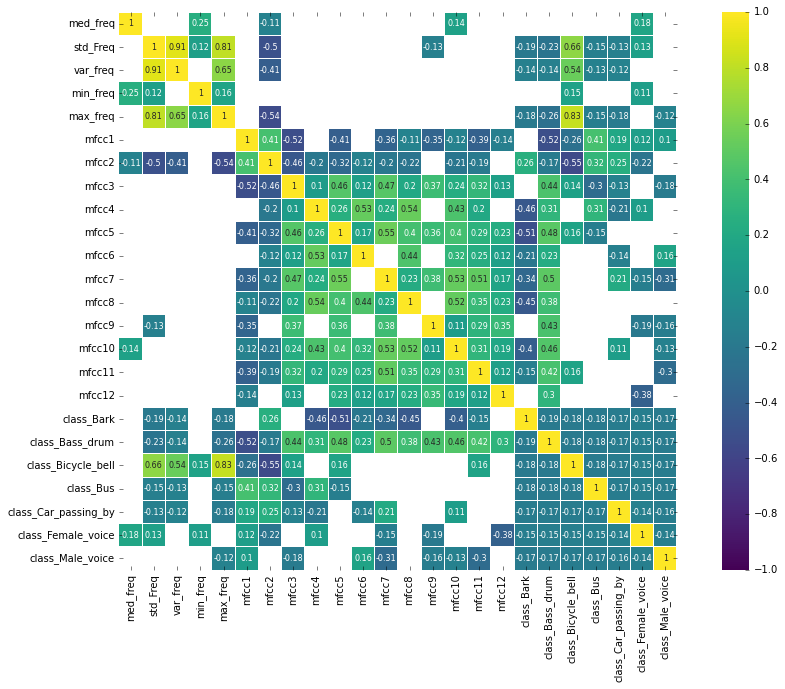

In [27]:
plt.figure(figsize=(16,10))
corr=df_dumm.corr()
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

## Distribution of sounds Vs. frequency

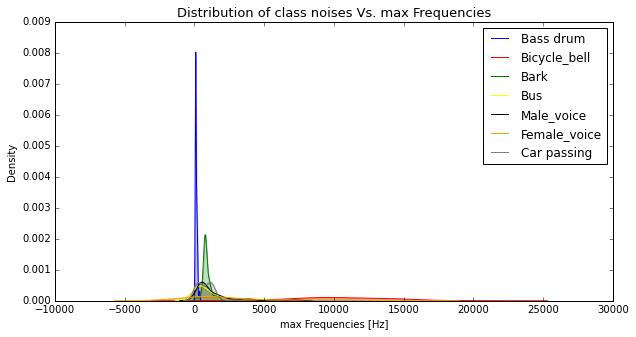

In [28]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Bass_drum'] == 1) ],
                color="blue", shade = True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Bicycle_bell'] == 1) ],
                ax =ax, color="red", shade= True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Bark'] == 1) ],
                ax =ax, color="green", shade= True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Bus'] == 1) ],
                ax =ax, color="yellow", shade= True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Male_voice'] == 1) ],
                ax =ax, color="black", shade= True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Female_voice'] == 1) ],
                ax =ax, color="orange", shade= True)
ax = sns.kdeplot(df_dumm.max_freq[(df_dumm['class_Car_passing_by'] == 1) ],
                ax =ax, color="grey", shade= True)
ax.legend(['Bass drum', 'Bicycle_bell', 'Bark','Bus','Male_voice','Female_voice','Car passing'], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('max Frequencies [Hz]')
ax.set_title('Distribution of class noises Vs. max Frequencies', size = 13);

From the above figure , it can be seen that bass drum has a very high density, while the density of bark sound is also followed by the density of other sounds.

# 3. Mechine Learning

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
np.random.seed(0)

In [30]:
def classification_results(y, y_pred, name='', add_rep=True):  # False
    acc = accuracy_score(y, y_pred)
                        
    cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                      index=classes, 
                      columns=classes)

    print(name + ' accuracy: ', round(acc,4),'\n') # round(acc,4)
    print(cm,'\n')
    if (add_rep):
        print(classification_report(y, y_pred))

In [31]:
df = read_csv("features.csv")
train, test = train_test_split(df, test_size=0.3,  random_state=0)  #, random_state=0


In [32]:
X_train = train[train.columns[2:-1]]
y_train = train[train.columns[-1]]
X_test = test[test.columns[2:-1]]
y_test = test[test.columns[-1]]


## K-nearest neighbors (KNN) classifier 

---



In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer, RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, precision_score 

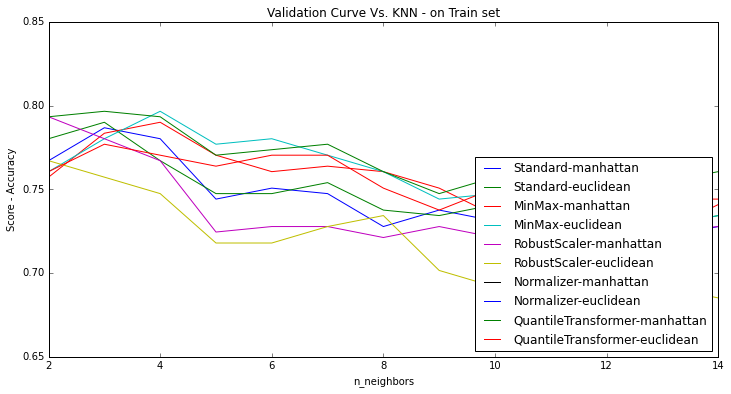

In [34]:
scalers =np.array( [['Standard', StandardScaler()], 
                   ['MinMax', MinMaxScaler()], 
                   ['RobustScaler', RobustScaler()],
                   ['Normalizer' , Normalizer()],
                   ['QuantileTransformer', QuantileTransformer(n_quantiles=len(X_train))]])

plt.figure(figsize=(12, 6))
legend =[]
for [scaler_name, scaler_func] in scalers:
    for metric in ['manhattan', 'euclidean']:    #'hamming'
        scaler = scaler_func
        scaler.fit(X_train)
        X = scaler.transform(X_train) 
        y = y_train
        param='n_neighbors'
        param_range = range(2,15,1)
        train_scores, test_scores = validation_curve(KNeighborsClassifier(metric=metric),
                                                     X, y,                                        
                                                     param_name=param,
                                                     param_range=param_range,
                                                     scoring="accuracy",
                                                     cv=5) 
        
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.plot(param_range, test_scores_mean);
        legend.append(scaler_name+'-'+metric)

    plt.title("Validation Curve Vs. KNN - on Train set")
    plt.xlabel(param)
    plt.ylabel("Score - Accuracy")
    plt.ylim(0.65, 0.85)      
    plt.legend(legend, loc='lower right')
plt.show()

From the figure above we could see accuracy score is high for n_neighbour =4

In [35]:
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')   #6,euclidean manhattan

# Scale Transform and normalization   
scaler = QuantileTransformer(n_quantiles=len(X_train)).fit(X_train)   # 

X = scaler.transform(X_train)  
y = y_train

knn.fit(X, y);

In [36]:
y_train_pred = knn.predict(X)
cm = confusion_matrix(y_true=y, y_pred=y_train_pred)


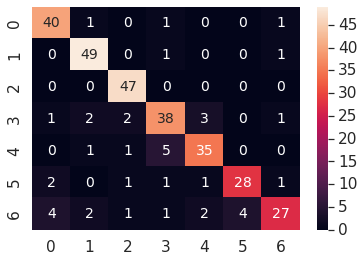

In [37]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,annot_kws={"size": 14}, fmt='g')

In [38]:
print ('\nClassification_report on Test set\n',classification_report(y_true=y, y_pred=y_train_pred))


Classification_report on Test set
                 precision    recall  f1-score   support

          Bark       0.85      0.93      0.89        43
     Bass_drum       0.89      0.96      0.92        51
  Bicycle_bell       0.90      1.00      0.95        47
           Bus       0.81      0.81      0.81        47
Car_passing_by       0.85      0.83      0.84        42
  Female_voice       0.88      0.82      0.85        34
    Male_voice       0.87      0.66      0.75        41

      accuracy                           0.87       305
     macro avg       0.86      0.86      0.86       305
  weighted avg       0.87      0.87      0.86       305



In [39]:
X_test_knn = scaler.transform(X_test) 
y_test_pred = knn.predict(X_test_knn)


Confusion matrix on Test set:



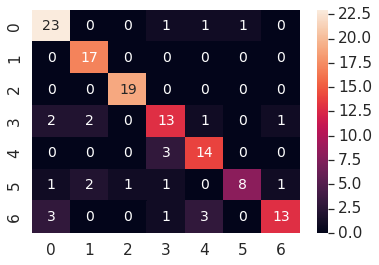

In [40]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('\nConfusion matrix on Test set:\n')
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,annot_kws={"size": 14}, fmt='g')

In [41]:
print ('\nClassification_report on Test set\n',classification_report(y_true=y_test, y_pred=y_test_pred))


Classification_report on Test set
                 precision    recall  f1-score   support

          Bark       0.79      0.88      0.84        26
     Bass_drum       0.81      1.00      0.89        17
  Bicycle_bell       0.95      1.00      0.97        19
           Bus       0.68      0.68      0.68        19
Car_passing_by       0.74      0.82      0.78        17
  Female_voice       0.89      0.57      0.70        14
    Male_voice       0.87      0.65      0.74        20

      accuracy                           0.81       132
     macro avg       0.82      0.80      0.80       132
  weighted avg       0.82      0.81      0.81       132



# CONCLUSION

1. By using K-Neasrest neighbours Algorithm we have achieved an accuracy of 0.81 in the test data
2. It can be inferred from this project that MFCC (Mel -Frequency cepstral coefficient ) is very good representative of sound waves . 